In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("sales_data_with_discounts (1).csv")

In [12]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [15]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

In [16]:
print(numeric_cols)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [5]:
# Calculate statistics
mean_values = df[numeric_cols].mean()
median_values = df[numeric_cols].median()
mode_values = df[numeric_cols].mode().iloc[0]   # take first mode
std_values = df[numeric_cols].std()

In [ ]:
#Display Result

In [7]:
print("Mean:\n", mean_values, "\n")

Mean:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64 



In [8]:
print("Median:\n", median_values, "\n")

Median:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64 



In [9]:
print("Mode:\n", mode_values, "\n")

Mode:
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64 



In [10]:
print("Standard Deviation:\n", std_values)

Standard Deviation:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


In [ ]:
#plotting histogram

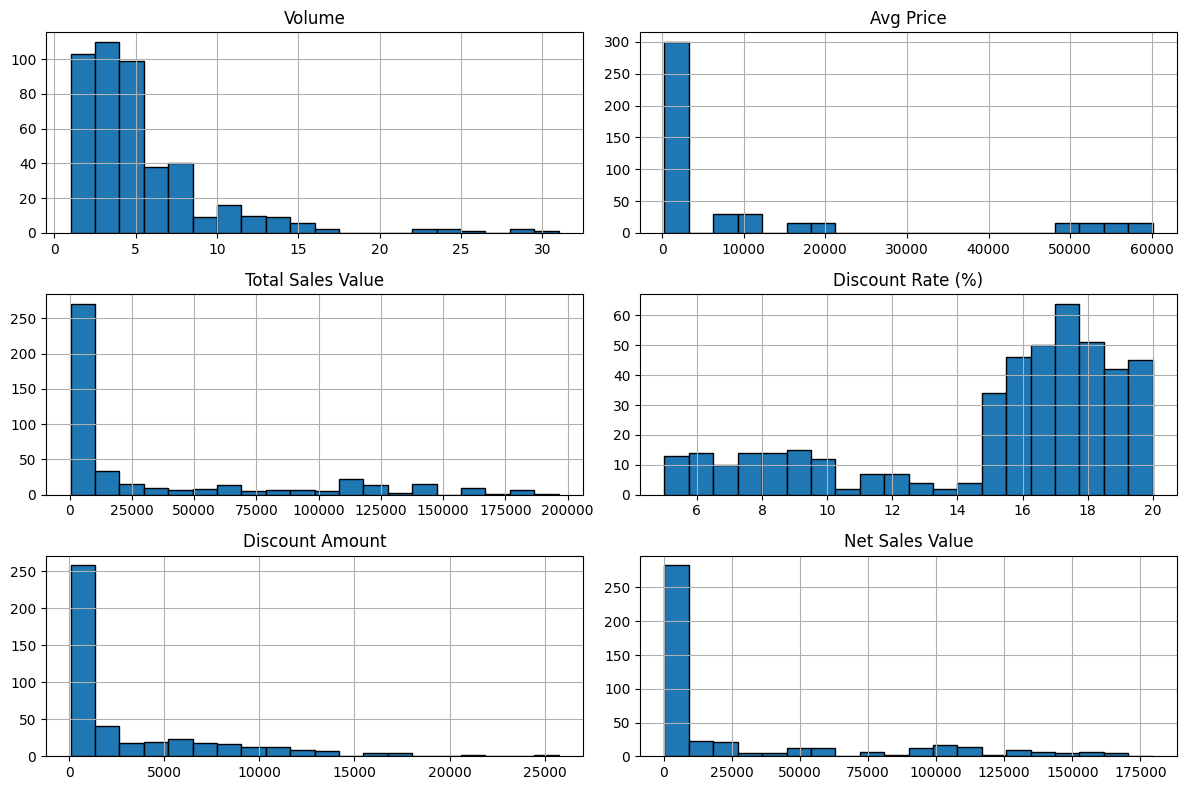

In [20]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

numeric_df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


In [ ]:
#Boxplot

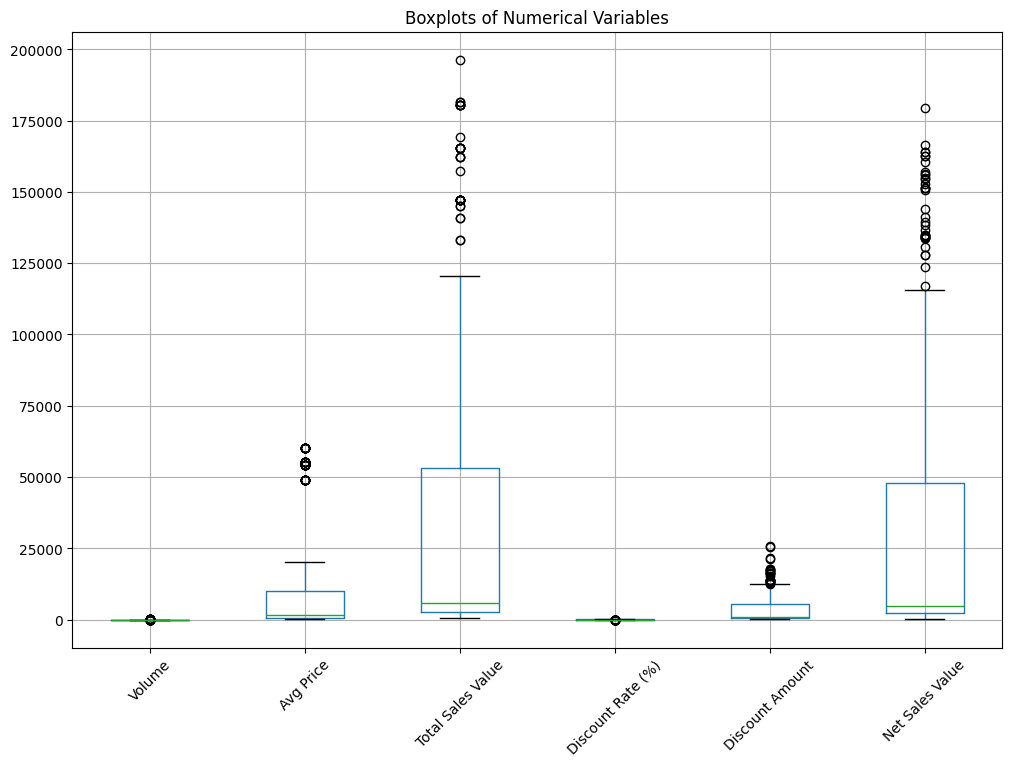

In [21]:
plt.figure(figsize=(12, 8))
numeric_df.boxplot()
plt.title("Boxplots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Outliers

In [22]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

print("Outliers count per column:\n")
print(outliers.sum())


Outliers count per column:

Volume               44
Avg Price            60
Total Sales Value    36
Discount Rate (%)    45
Discount Amount      24
Net Sales Value      35
dtype: int64


In [ ]:
#Barchart for all categorical columns

In [23]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


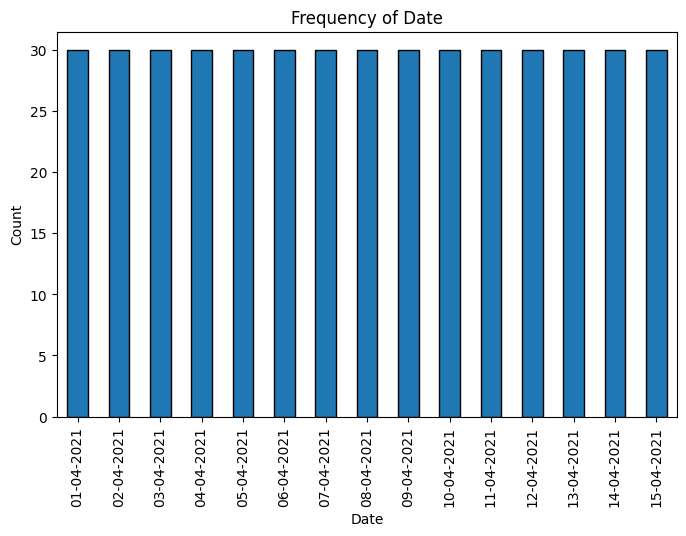

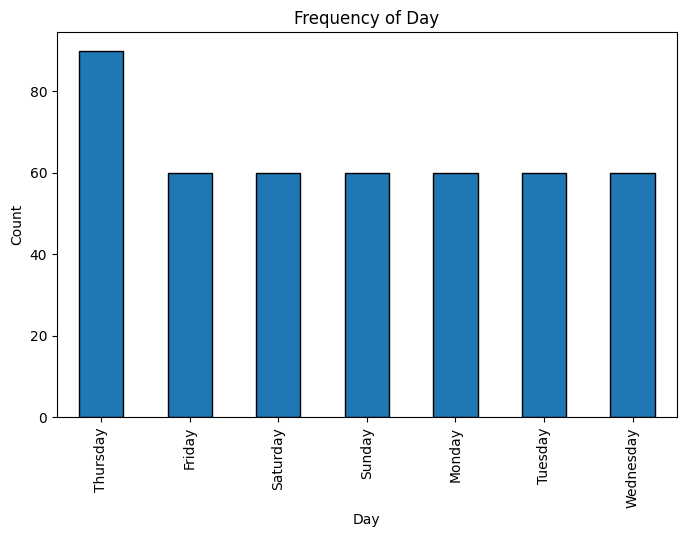

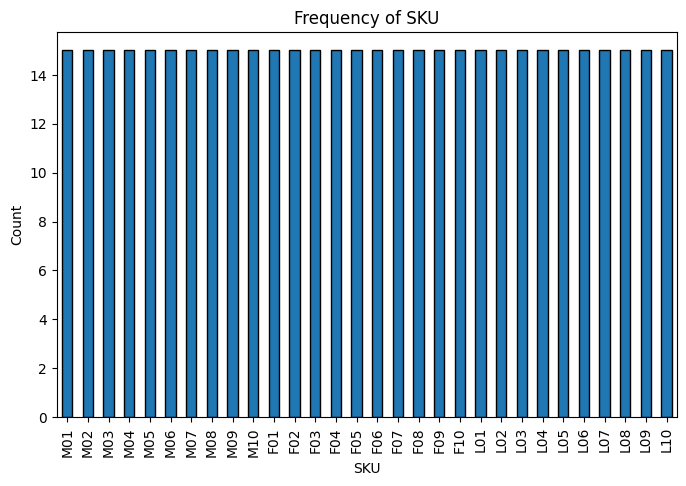

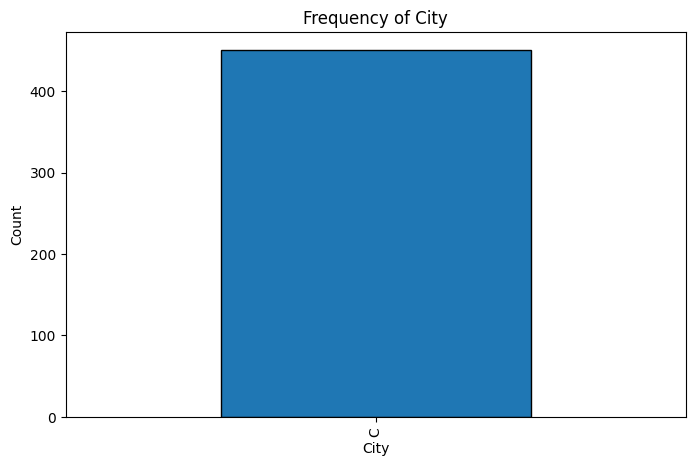

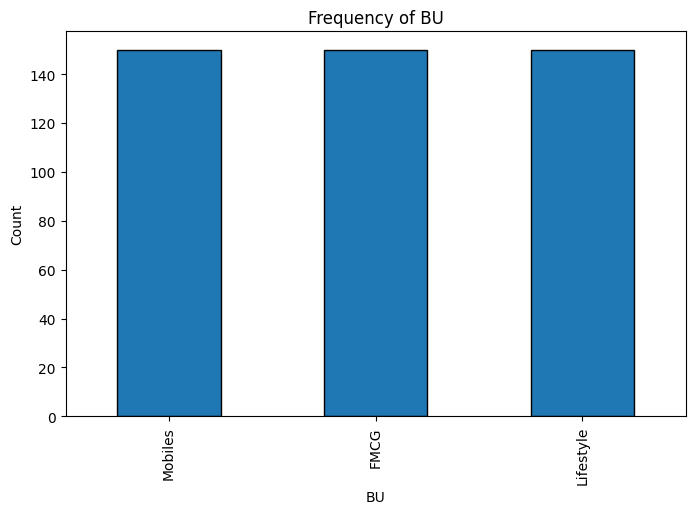

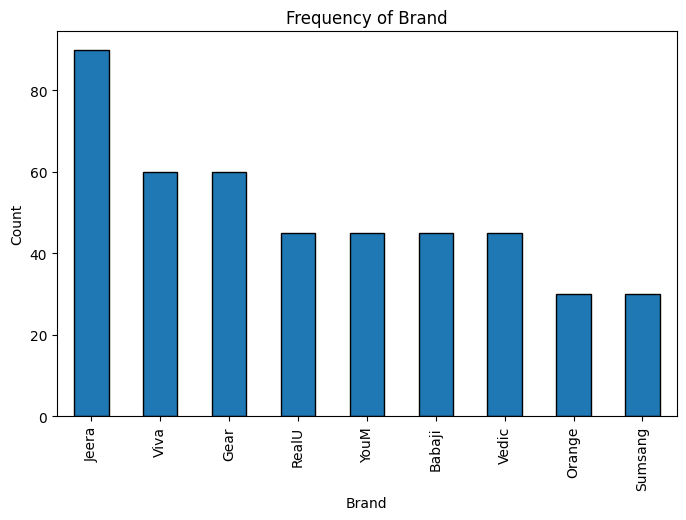

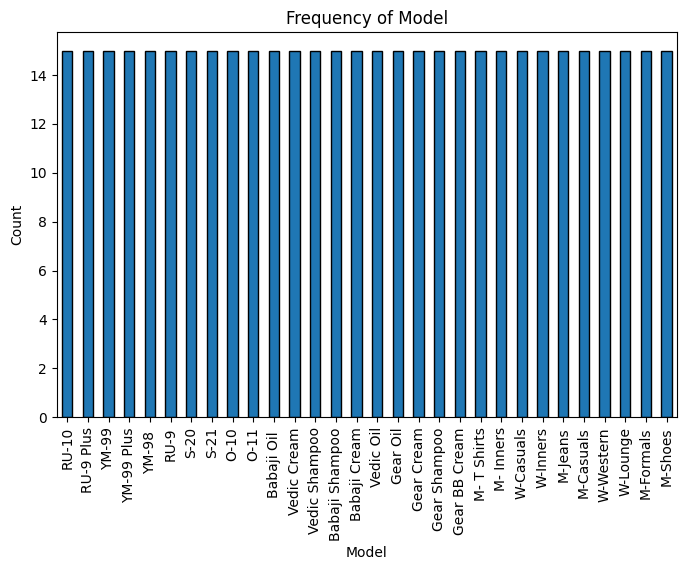

In [25]:
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f"Frequency of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()


In [ ]:
#Conclusion

In [ ]:
The dataset shows healthy business activity with clear patterns in sales behavior.

Most transactions are small but occasional large orders significantly influence revenue.

Outliers are meaningful and not errors—they represent valuable customer segments (bulk buyers).

Product and region distributions indicate where the company is performing strongly and where improvement is needed.

Understanding these patterns helps in:

Inventory planning

Pricing and discount strategies

Sales forecasting

Customer segmentation

Marketing decision-making